In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 61.9 MB/s eta 0:00:00


In [3]:
import os

#현재 폴더 경로; 작업 폴더 기준
print(os.getcwd())

/content


In [4]:
os.chdir("/content/drive/MyDrive/chart2text/unichart/UniChart")

In [5]:
print(os.getcwd())

/content/drive/MyDrive/chart2text/unichart/UniChart


In [6]:
import os
import json
def load_dataset():
    #pew_dataset 1000ea
    #statista_dataset 1000ea
    #scicap_data nosubfig 1000ea
    #simulated_scatter 2000ea
    #test 100
    pew_dataset_root_path='../../dataset/pew_dataset_reduced'
    statista_dataset_root_path='../../dataset/statista_dataset_reduced'
    scicap_data_root_path='../../dataset/scicap_data_reduced'
    simulated_scatter_root_path='../../dataset/simulated_scatter_dataset'
    train_dataset=[]
    valid_dataset=[]
    test_dataset=[]
    #####################################################################################
    #####################################################################################

    for r_path in [pew_dataset_root_path,statista_dataset_root_path]:
        imagpath=os.path.join(r_path,'dataset','imgs')
        capspath=os.path.join(r_path,'dataset','captions')

        fileEx = r'.png'
        file_list = [file.split('.')[0] for file in os.listdir(imagpath) if file.endswith(fileEx)]
        train_file_list=file_list[:1000]
        valid_file_list=file_list[1000:1100]
        test_file_list=file_list[1100:1200]

        def readTxt(path):
            # readline_all.py
            f = open(path, 'r')
            result=""
            while True:
                line = f.readline()
                if not line: break
                result+=line+' '
            f.close()
            return result

        for filename in train_file_list:
            image_path=os.path.join(imagpath,f'{filename}.png')
            cap_path=os.path.join(capspath,f'{filename}.txt')
            train_dataset.append({'image':image_path,'text':readTxt(cap_path)})

        for filename in valid_file_list:
            image_path=os.path.join(imagpath,f'{filename}.png')
            cap_path=os.path.join(capspath,f'{filename}.txt')
            valid_dataset.append({'image':image_path,'text':readTxt(cap_path)})

        for filename in test_file_list:
            image_path=os.path.join(imagpath,f'{filename}.png')
            cap_path=os.path.join(capspath,f'{filename}.txt')
            test_dataset.append({'image':image_path,'text':readTxt(cap_path)})
    #####################################################################################
    #####################################################################################

    capspath=os.path.join(scicap_data_root_path,'SciCap-Caption-All','train')
    fileEx = r'.json'
    file_list = [file for file in os.listdir(capspath) if file.endswith(fileEx)]
    train_file_list=[]

    for filename in file_list:
        cap_path=os.path.join(capspath,filename)
        with open(cap_path) as f:
            json_object = json.load(f)
        if "contains-subfigure" in json_object:
            if json_object["contains-subfigure"]==False:
                train_file_list.append(filename)
                if len(train_file_list)==1000:
                    break

    imgpath=os.path.join(scicap_data_root_path,'SciCap-No-Subfig-Img','train')
    for filename in train_file_list:
        cap_path=os.path.join(capspath,filename)
        with open(cap_path) as f:
            json_object = json.load(f)
        if "contains-subfigure" in json_object and "figure-ID" in json_object and "1-lowercase-and-token-and-remove-figure-index" in json_object:
            image_file_name=json_object['figure-ID']
            image_path=os.path.join(imgpath,image_file_name)
            train_dataset.append({'image':image_path,'text':json_object['1-lowercase-and-token-and-remove-figure-index']['caption']})

    capspath=os.path.join(scicap_data_root_path,'SciCap-Caption-All','val')
    fileEx = r'.json'
    file_list = [file for file in os.listdir(capspath) if file.endswith(fileEx)]
    valid_file_list=[]

    for filename in file_list:
        cap_path=os.path.join(capspath,filename)
        with open(cap_path) as f:
            json_object = json.load(f)
        if "contains-subfigure" in json_object:
            if json_object["contains-subfigure"]==False:
                valid_file_list.append(filename)
                if len(valid_file_list)==100:
                    break

    imgpath=os.path.join(scicap_data_root_path,'SciCap-No-Subfig-Img','val')
    for filename in valid_file_list:
        cap_path=os.path.join(capspath,filename)
        with open(cap_path) as f:
            json_object = json.load(f)
        if "contains-subfigure" in json_object and "figure-ID" in json_object and "1-lowercase-and-token-and-remove-figure-index" in json_object:
            image_file_name=json_object['figure-ID']
            image_path=os.path.join(imgpath,image_file_name)
            valid_dataset.append({'image':image_path,'text':json_object['1-lowercase-and-token-and-remove-figure-index']['caption']})


    capspath=os.path.join(scicap_data_root_path,'SciCap-Caption-All','test')
    fileEx = r'.json'
    file_list = [file for file in os.listdir(capspath) if file.endswith(fileEx)]
    test_file_list=[]

    for filename in file_list:
        cap_path=os.path.join(capspath,filename)
        with open(cap_path) as f:
            json_object = json.load(f)
        if "contains-subfigure" in json_object:
            if json_object["contains-subfigure"]==False:
                test_file_list.append(filename)
                if len(test_file_list)==100:
                    break

    imgpath=os.path.join(scicap_data_root_path,'SciCap-No-Subfig-Img','test')
    for filename in test_file_list:
        cap_path=os.path.join(capspath,filename)
        with open(cap_path) as f:
            json_object = json.load(f)
        if "contains-subfigure" in json_object and "figure-ID" in json_object and "1-lowercase-and-token-and-remove-figure-index" in json_object:
            image_file_name=json_object['figure-ID']
            image_path=os.path.join(imgpath,image_file_name)
            test_dataset.append({'image':image_path,'text':json_object['1-lowercase-and-token-and-remove-figure-index']['caption']})

    #####################################################################################
    #####################################################################################
    capspath=os.path.join(simulated_scatter_root_path,'data','train')
    imagepath=os.path.join(simulated_scatter_root_path,'image','train')
    fileEx = r'.json'
    file_list = [file.split('.')[0] for file in os.listdir(capspath) if file.endswith(fileEx)]

    for filename in file_list:
        image_path=os.path.join(imagepath,f'{filename}.png')
        cap_path=os.path.join(capspath,f'{filename}.json')
        with open(cap_path) as f:
            json_object = json.load(f)
        if "description_rewrite" in json_object:
            train_dataset.append({'image':image_path,'text':json_object['description_rewrite'],'origin_text':cap_path})

    capspath=os.path.join(simulated_scatter_root_path,'data','valid')
    imagepath=os.path.join(simulated_scatter_root_path,'image','valid')
    fileEx = r'.json'
    file_list = [file.split('.')[0] for file in os.listdir(capspath) if file.endswith(fileEx)]

    for filename in file_list:
        image_path=os.path.join(imagepath,f'{filename}.png')
        cap_path=os.path.join(capspath,f'{filename}.json')
        with open(cap_path) as f:
            json_object = json.load(f)
        if "description_rewrite" in json_object:
            valid_dataset.append({'image':image_path,'text':json_object['description_rewrite'],'origin_text':cap_path})

    capspath=os.path.join(simulated_scatter_root_path,'data','test')
    imagepath=os.path.join(simulated_scatter_root_path,'image','test')
    fileEx = r'.json'
    file_list = [file.split('.')[0] for file in os.listdir(capspath) if file.endswith(fileEx)]

    for filename in file_list:
        image_path=os.path.join(imagepath,f'{filename}.png')
        cap_path=os.path.join(capspath,f'{filename}.json')
        with open(cap_path) as f:
            json_object = json.load(f)
        if "description_rewrite" in json_object:
            test_dataset.append({'image':image_path,'text':json_object['description_rewrite'],'origin_text':cap_path})
    dataset=dict()
    dataset['train']=train_dataset
    dataset['valid']=valid_dataset
    dataset['test']=test_dataset
    return dataset

In [7]:
dataset = load_dataset()
print(len(dataset['train']))

6504


In [8]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from transformers import VisionEncoderDecoderConfig
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig
import argparse
from torch.utils.data import DataLoader
from typing import List


from data.summary_data import SummaryChartDataset
from model.summary_model import SummaryChartModule

import pytorch_lightning as pl

#from pytorch_lightning.loggers import WandbLogger
#from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks import ModelCheckpoint

class ArgDataClass:
    def __init__(self,max_length,batch_size,valid_batch_size,num_workers):
        self.max_length=max_length
        self.batch_size=batch_size
        self.valid_batch_size=valid_batch_size
        self.num_workers=num_workers

def main():
    output_dir="./output"
    # Instantiate the parser
    # parser = argparse.ArgumentParser(description='Train Chart Transformer')

    # parser.add_argument('--output-dir', type=str, default="/content/output_data", help='Path to the output directory for saving the checkpoints')
    # parser.add_argument('--max-steps', type=int, default = 1000, help='Max number of iterations')
    # parser.add_argument('--batch-size', type=int, default=2, help='Batch Size for the model')
    # parser.add_argument('--valid-batch-size', type=int, default=2, help='Valid Batch Size for the model')
    # parser.add_argument('--max-length', type=int, default=512, help='Max length for decoder generation')
    # parser.add_argument('--num-workers', type=int, default=2, help='Number of workers')
    # parser.add_argument('--lr', type=float, default=5e-5, help='learning rate')

    # parser.add_argument('--check-val-every-n-epoch', type=int, default=1, help='Ru validation every n epochs')
    # parser.add_argument('--log-every-n-steps', type=int, default=50, help='Log every n steps')
    # parser.add_argument('--warmup-steps', type=int, default=50, help='Warmup steps')
    # parser.add_argument('--checkpoint-steps', type=int, default=1000, help='Checkpoint steps')
    # parser.add_argument('--gradient-clip-val', type=float, default=1.0, help='gradient clip value')

    # parser.add_argument('--accumulate-grad-batches', type=int, default=1, help='accumulate grad batches')
    # parser.add_argument('--gpus-num', type=int, default=1, help='gpus num')
    # parser.add_argument('--nodes-num', type=int, default=1, help='nodes num')

    # parser.add_argument('--checkpoint-path', type=str, default = "ahmed-masry/unichart-base-960", help='Path to the checkpoint')

    # args = parser.parse_args()

    processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
    model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")

    dataset = load_dataset()
    args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
    train_dataset = SummaryChartDataset(dataset["train"], processor = processor, max_length=args.max_length,
                                split="train", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )

    val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )

    config = {"max_steps":2000*1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"])//1.2,
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "result_path": output_dir,
            "verbose": True,
            }

    # config = {"max_steps":args.max_steps,
    #         "check_val_every_n_epoch":args.check_val_every_n_epoch,
    #         "log_every_n_steps":args.log_every_n_steps,
    #         "gradient_clip_val":args.gradient_clip_val,
    #         "num_training_samples_per_epoch": len(dataset["train"]),
    #         "lr":args.lr,
    #         "train_batch_sizes": [args.batch_size],
    #         "val_batch_sizes": [args.valid_batch_size],
    #         "num_nodes": args.nodes_num,
    #         "warmup_steps": args.warmup_steps,
    #         "result_path": args.output_dir,
    #         "verbose": True,
    #         }

    model_module = SummaryChartModule(config, processor, model, args, train_dataset, val_dataset)

    # wandb_logger = WandbLogger(project="UniChart-ChartQA")
    # lr_callback = LearningRateMonitor(logging_interval="step")
    checkpoint_callback = ModelCheckpoint(dirpath=output_dir, every_n_train_steps = 20000, save_last = False, save_top_k = -1)

    trainer = pl.Trainer(
        accelerator="gpu",
        devices=1,
        max_steps=config['max_steps'],
        check_val_every_n_epoch=2,
        # val_check_interval=100,
        log_every_n_steps=50,
        gradient_clip_val=1,
        num_nodes=1,
        precision=16, # we'll use mixed precision
        num_sanity_val_steps=0,
        #enable_checkpointing=True,
        default_root_dir=output_dir,
        # logger=wandb_logger,
        callbacks=[checkpoint_callback],
    )

    trainer.fit(model_module)


if __name__ == '__main__':
    main()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
import torch
from transformers import VisionEncoderDecoderConfig
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig
import argparse
from torch.utils.data import DataLoader
from typing import List


from data.summary_data import SummaryChartDataset
from model.summary_model import SummaryChartModule

processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

class ArgDataClass:
    def __init__(self,max_length,batch_size,valid_batch_size,num_workers):
        self.max_length=max_length
        self.batch_size=batch_size
        self.valid_batch_size=valid_batch_size
        self.num_workers=num_workers
dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(401)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot shows the clustering results of groups between 'DNA' and 'possesion' relationships. The data points for 'DNA' typically have a mean of -426.944 and a standard deviation of 2312.404, while the data points for 'possesion' typically have a mean of -1107.552 and a standard deviation of 165.197. There are a total of 9 groups, and the data distribution of the groups appears to be one distribution."]
answer <summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot displays the clustering results for groups between 'DNA' and 'possession' relationships. Typically, the data points for 'DNA' have a mean of approximately 681.397 and a standard deviation of around 2436.296, while the data points for 'possession' typically have a mean of roughly -1144.38 and a standard deviation of about 286.031. There are in

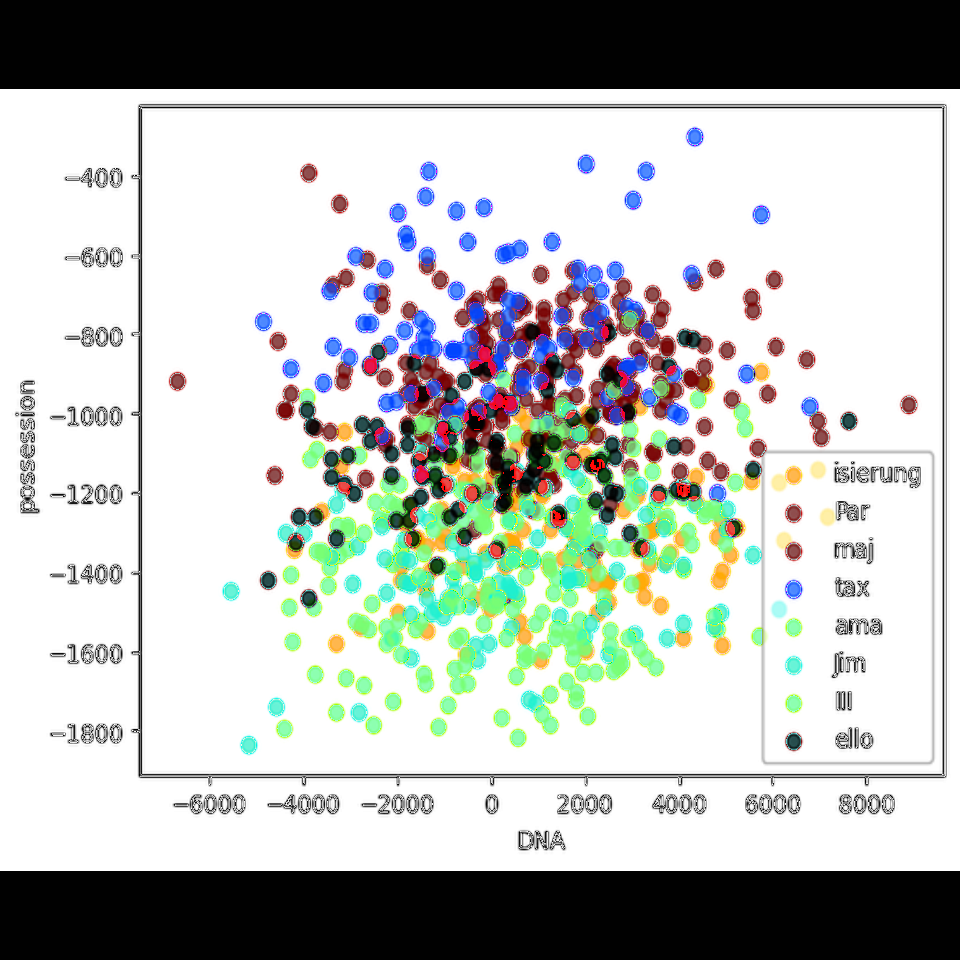

In [18]:
im

In [19]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(402)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between 'cough' and'soup', with a mean of 288.913 and a standard deviation of 2.189 for 'cough', and a mean of 45.44 and a standard deviation of 8.618 for'soup'. There are four groups in total, and the correlation coefficient is -0.021, indicating no linear relationship between the two data sets."]
answer <summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between 'cough' and 'soup', with a mean of 287.434 and a standard deviation of 3.084 for 'cough', and a mean of 45.826 and a standard deviation of 23.252 for 'soup'. There are four groups in total, and the correlation coefficient is -0.16, indicating no linear relationship between the two data sets.</s>


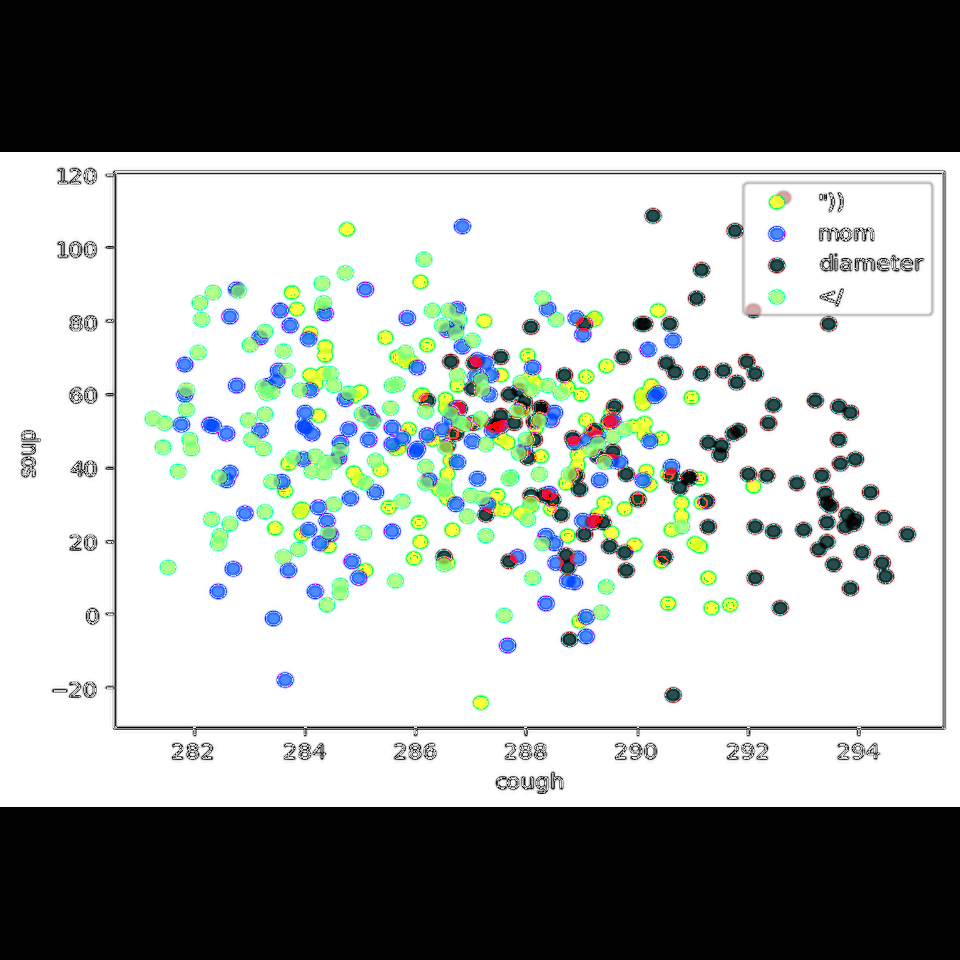

In [21]:
im

In [22]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(403)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between "Colonel" and "enterprises," with a mean of -114.789 and a standard deviation of 10.302 for the "Colonel" data, and a mean of -111.758 and a standard deviation of 5.736 for the "enterprises" data. There are a total of 9 groups, and no other abnormalities are present.']
answer <summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot depicts the relationship between "Colonel" and "enterprises". The average value of "Colonel" in this chart is -1142.511, with a standard deviation of 11.524. The average value of "enterprises" is -109.554, with a standard deviation of 5.885. There are nine groups in total. The correlation coefficient of this scatter plot is 0.048, indicating little to no linear relationship between the two datasets.</s>


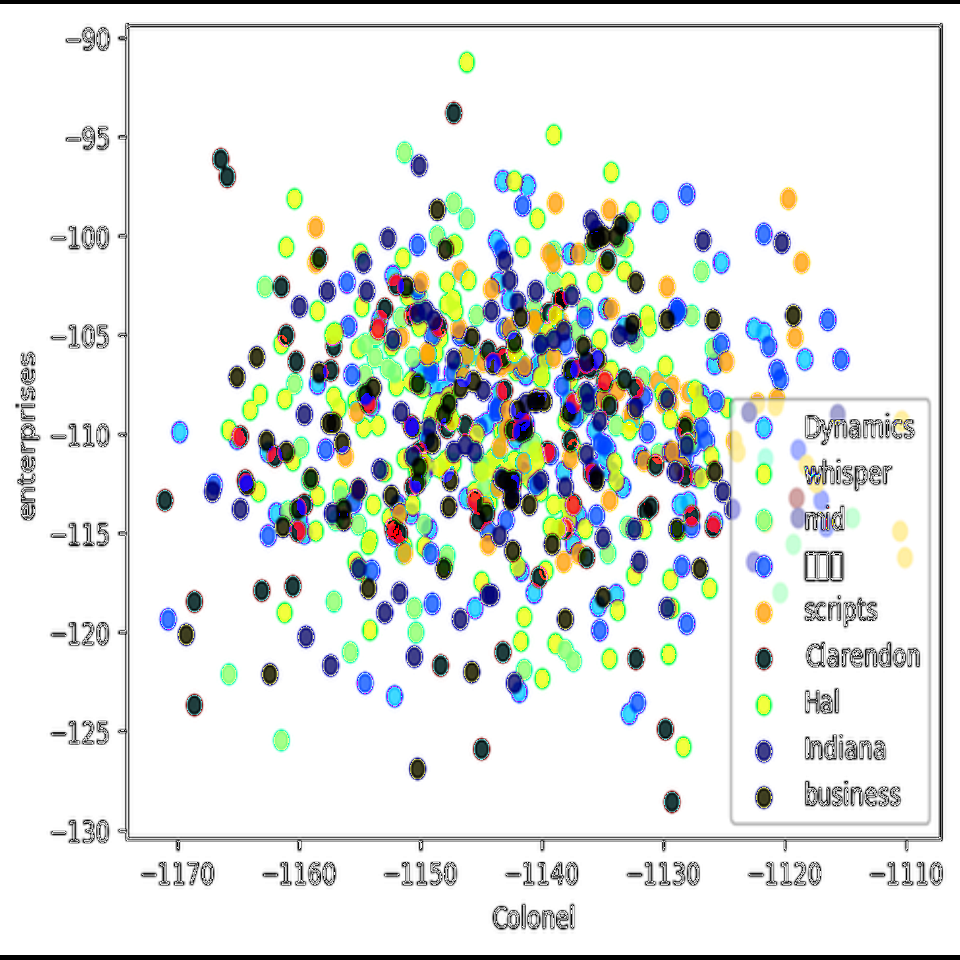

In [23]:
im

In [24]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(403)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between "Colonel" and "enterprises," with a mean of -114.789 and a standard deviation of 10.302 for the "Colonel" data, and a mean of -1093.193 and a standard deviation of 5.962 for the "enterprises" data. There are a total of 9 groups, and no other abnormalities are present in the data.']
answer <summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot depicts the relationship between "Colonel" and "enterprises". The average value of "Colonel" in this chart is -1142.511, with a standard deviation of 11.524. The average value of "enterprises" is -109.554, with a standard deviation of 5.885. There are nine groups in total. The correlation coefficient of this scatter plot is 0.048, indicating little to no linear relationship between the two datasets.</s>


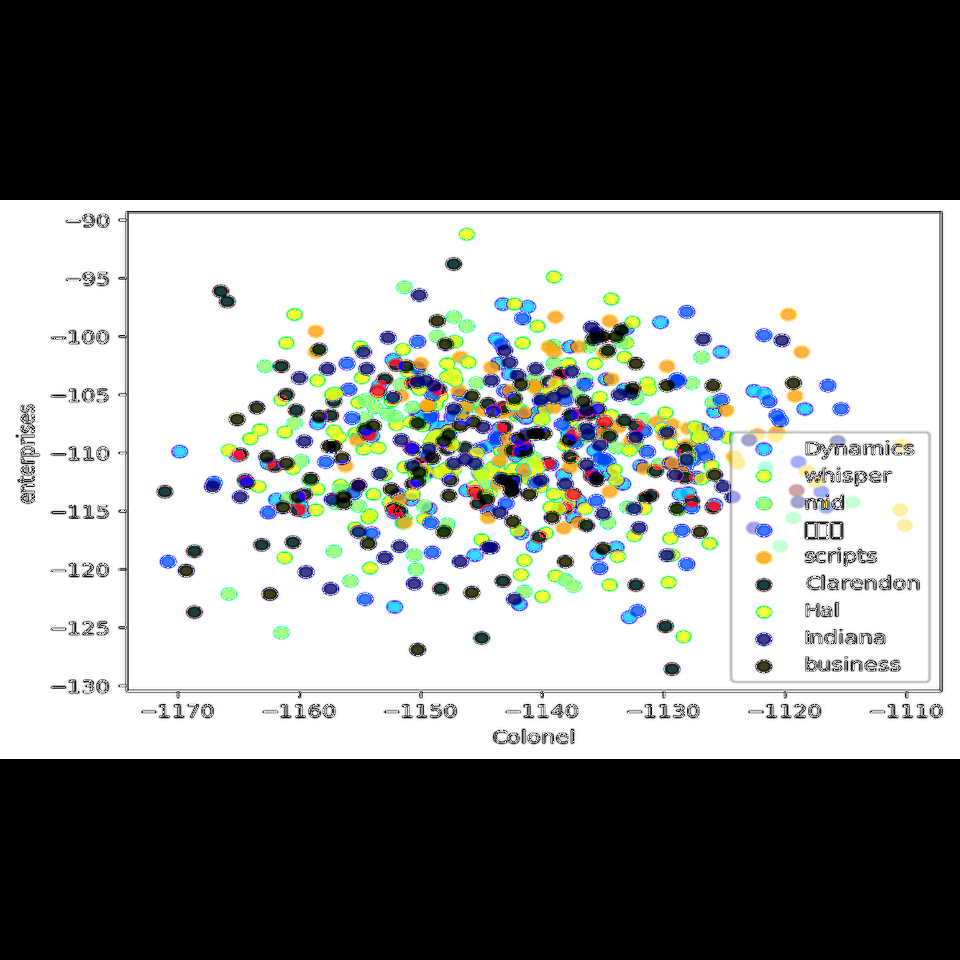

In [25]:
im

In [26]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(404)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot shows the clustering results of groups between "bref" and "Ander Association" relationships. The data points for "bref" typically have a mean of -2735.36 and a standard deviation of 1303.944, while the data points for "Ander Association" typically have a mean of -278.185 and a standard deviation of 181.169. There are a total of 13 groups, each with a unique color name (orange) and group name (orange) have group name (orange) and group name (either "-2010.) and group name (i.)313. Addi. Addi. Addi. Addi. The group has the other -25313. The group has the other -25313.18313.18391 and "']
answer <summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot displays the clustering results of groups between 'brief' and 'Andersen' relationships. The data points for 'brief' typically have a mean of approxim

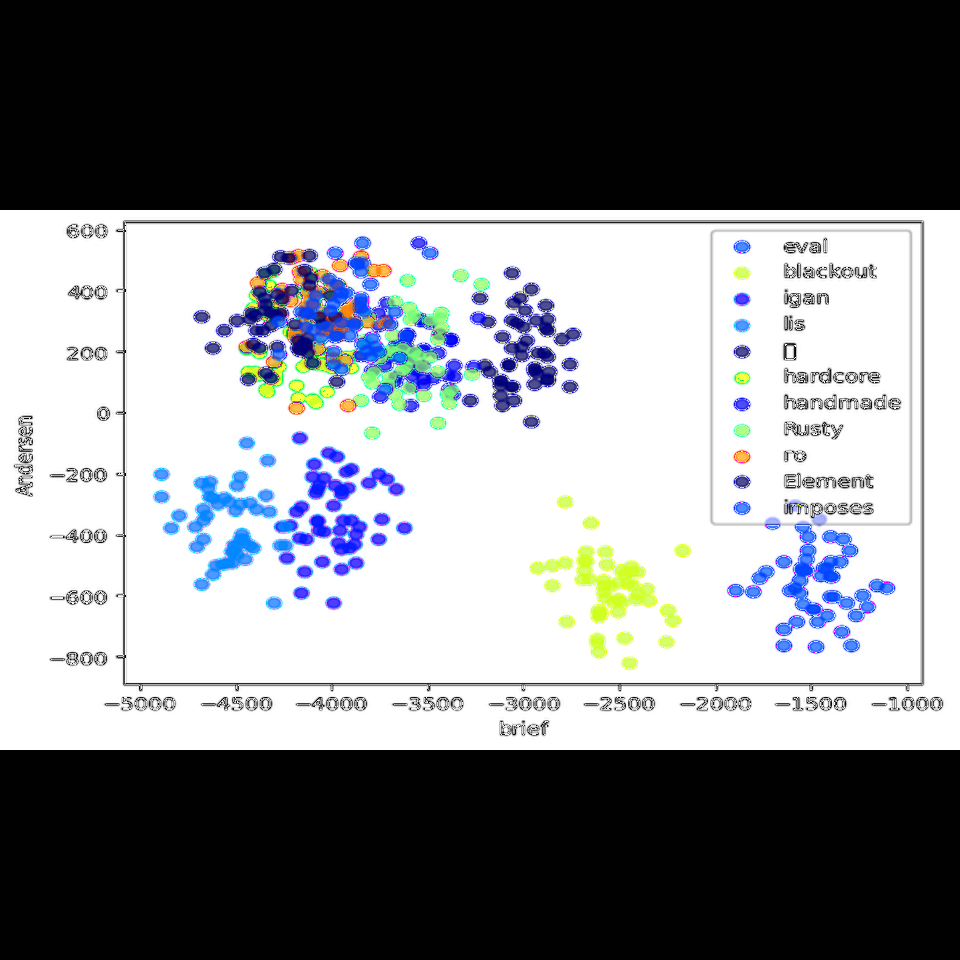

In [27]:
im

In [28]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(405)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot depicts the relationship between 'opinions' and 'Corespendence'. The mean values of 'opinions' are approximately 1982.381 with a standard deviation of 29.792, while the mean values of 'Corespendence' are around 709.502 with a standard deviation of 187. There are six groups in total. The correlation coefficient for this scatter plot is 0.611, indicating that there is little to no linear relationship between the two data sets."]
answer <summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between 'opinions' and 'Correspondence', with a mean of 2062.73 and a standard deviation of 410.809 for the 'opinions' data, and a mean of 691.203 and a standard deviation of 206.968 for the 'Correspondence' data. There are six groups in total, and the correlation coefficient between the two datasets is 0.45, 

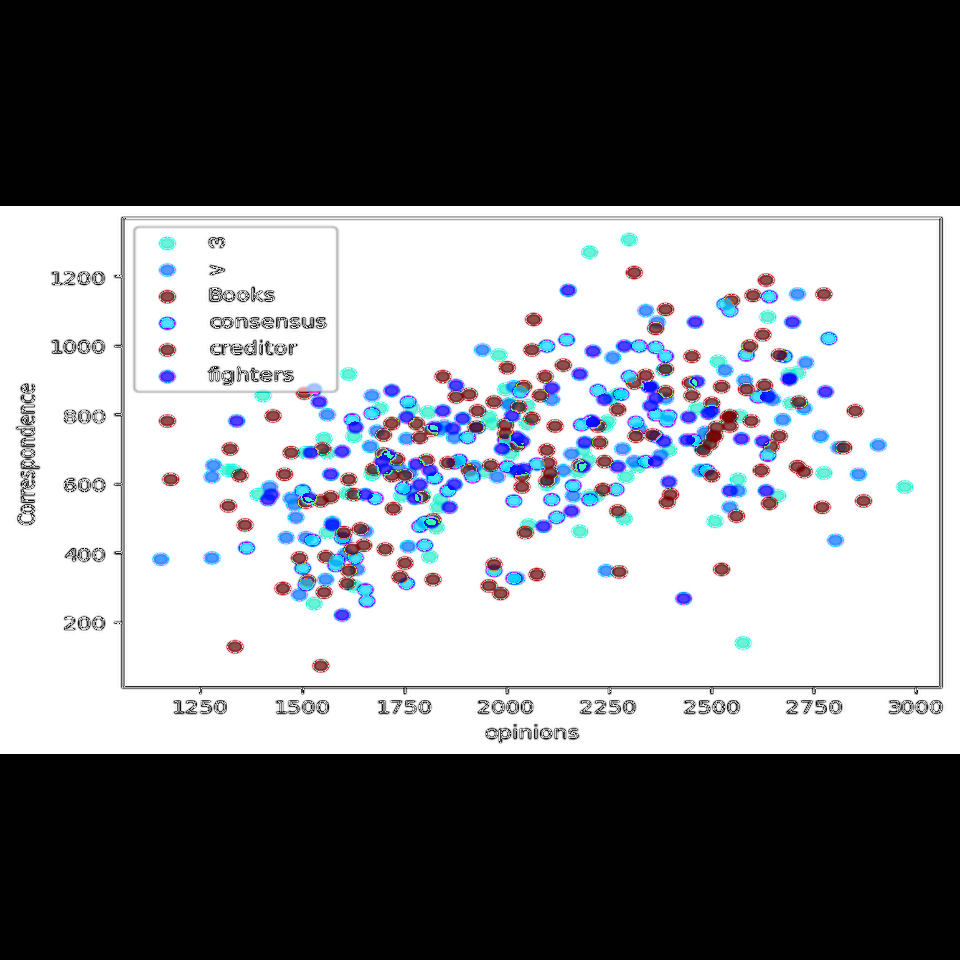

In [29]:
im

In [30]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(406)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between 'bi' and 'IT', with a mean of 1505.302 and a standard deviation of 347.675 for 'bi', and a mean of -250.401 and a standard deviation of 8.806 for 'IT'. There are a total of 7 groups, and the correlation coefficient is 0.013, indicating that there is little to no linear relationship between the two data sets."]
answer <summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot illustrates the relationship between "bij" and "IT," with a mean of 1483.158 and a standard deviation of 282.887 for "bij" and a mean of -248.169 and a standard deviation of 8.013 for "IT." There are seven groups in total, and the correlation coefficient is -0.054, indicating no linear relationship between the two data sets.</s>


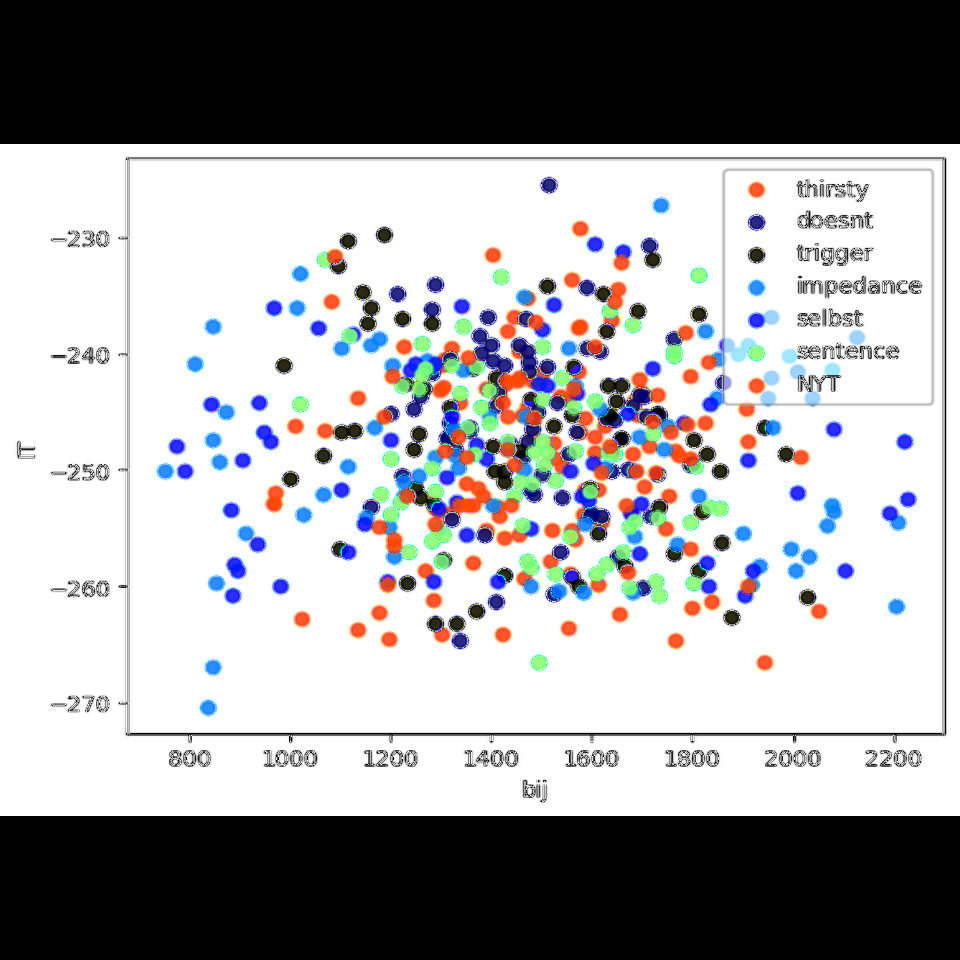

In [31]:
im

In [32]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(407)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot displays the clustering results of groups based on their '과' and 'tmp' relationships. The data points for '과' typically have a mean of 829.039 and a standard deviation of 50.982, while the data points for 'tmp' typically have a mean of 853.198 and a standard deviation of 71.977. There are two distinct groups visible in the chart, and they exhibit noticeable differences."]
answer <summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot displays the clustering results of groups based on the relationships between '這' and 'tmp'. The data points for '這' typically have a mean of 853.702 and a standard deviation of 58.018, while the data points for 'tmp' have a mean of 871.866 and a standard deviation of 84.408. There are two distinct groups, but no significant difference between them.</s>


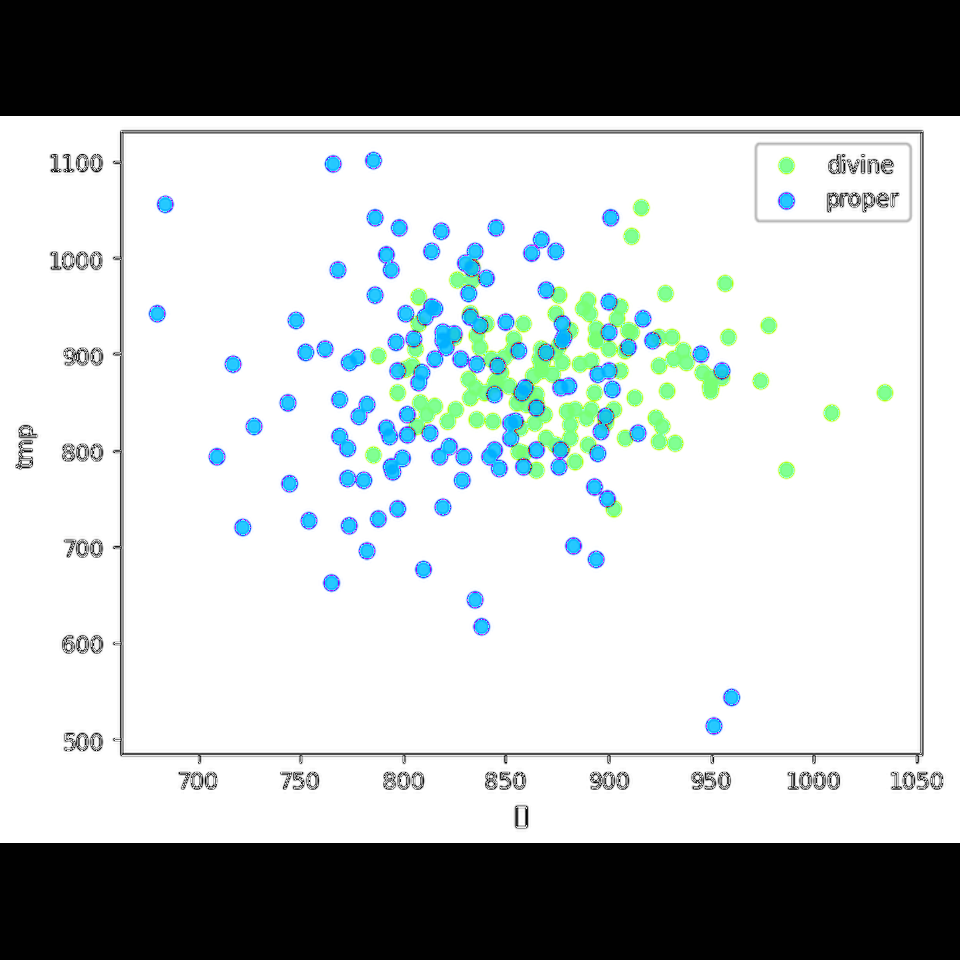

In [33]:
im

In [34]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(408)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about trend and its abnormalities <s_answer> "This scatterplot shows the distribution of values over time for \'premises\', with a mean of -773.012 and a standard deviation of 2.183. The data exhibits drift, but periodically returns to its original value. There are 10 groups in total, and no other abnormalities are present."']
answer <summarize_chart> describe this chart about trend and its abnormalities <s_answer> This scatterplot depicts the distribution of values over time for 'Centre', showcasing a mean of -771.385 and a standard deviation of 4.364. While there is drift, the values periodically return to their original mean. The chart features eight distinct groups, with one group, labeled 'News', exhibiting a unique trend that differs from the others by approximately 17%.</s>


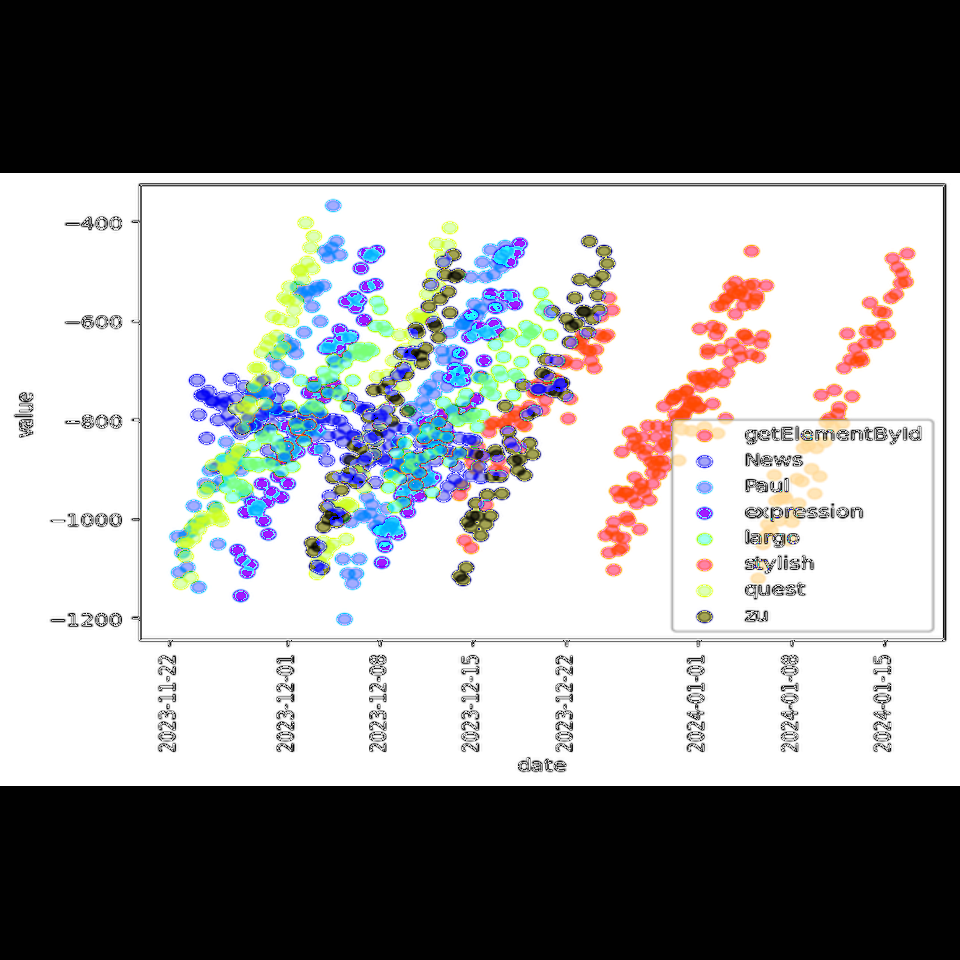

In [35]:
im

In [36]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(409)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> "This scatterplot shows the clustering results of groups between \'Orange\' and \'gar\' relationships. The data for \'Orange\' in this chart typically has a mean of -7.262 and a standard deviation of 175.127, while the data for \'gar\' typically has a mean of -42.628 and a standard deviation of 3672.97. There are a total of 13 groups, and the data distribution of the groups appears to be one continuous distribution."']
answer <summarize_chart> describe this chart about differences and clustering and its abnormalities <s_answer> This scatterplot reveals the clustering results for the relationship between "Orange" and "gar." The data points for "Orange" typically have a mean of 25.084 and a standard deviation of 155.466, while the data points for "gar" usually have a mean of 843.858 and a standard deviation of 2663.407. There are a total of 11 groups, and the data distributio

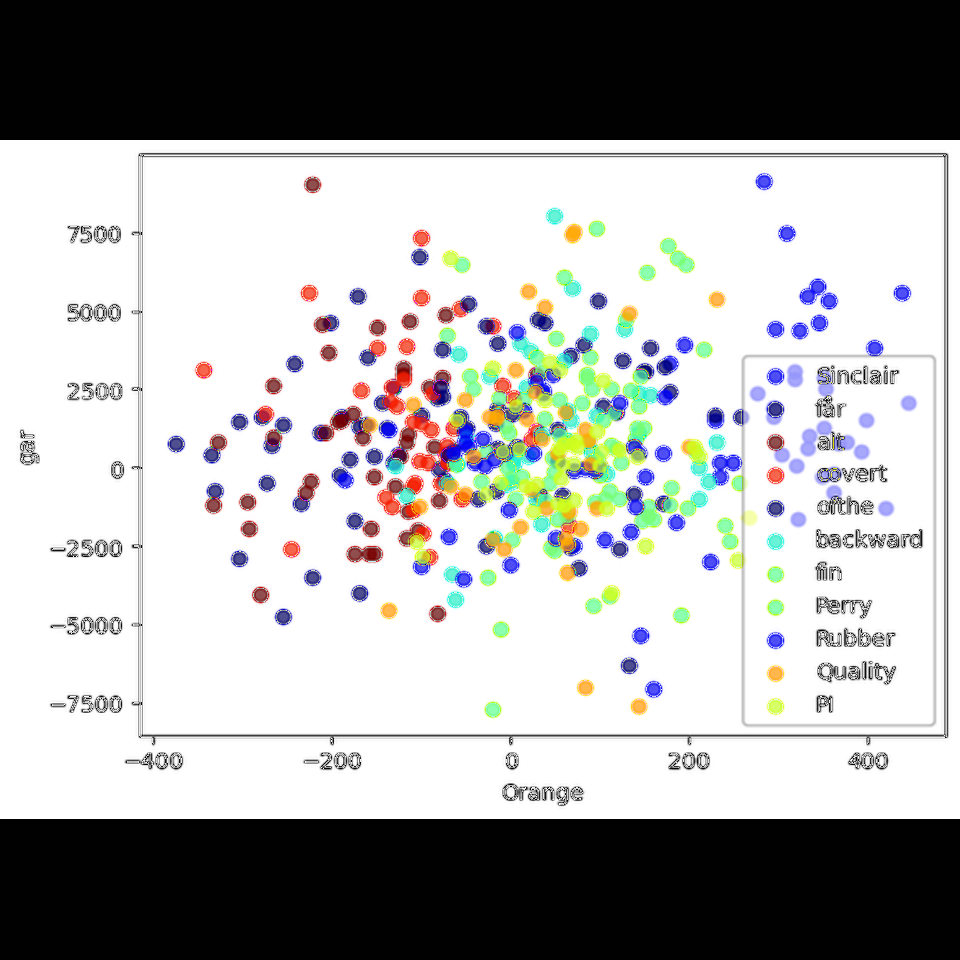

In [37]:
im

In [38]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(410)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about trend and its abnormalities <s_answer> "This scatterplot displays the distribution of values over time for \'exception\'. The data typically has a mean of -839.579 and a standard deviation of 8.486, and it shows a negative slope as it continues to decrease. There are 14 distinct groups represented in the chart, and two of them (the blue \'ray\' group and the orange \'break\' group) have noticeably different slopes compared to the other groups, with differences of approximately 16% and 19%, respectively."']
answer <summarize_chart> describe this chart about trend and its abnormalities <s_answer> This chart displays the distribution of values over time for 'ра'. The data typically has a mean of -840.005 and a standard deviation of 4.295, trending downward with a negative slope. There are 14 distinct groups, each with its own unique trend. Specifically, the lightgreen 'Ch' group deviates from the others by approximately 16% in terms of

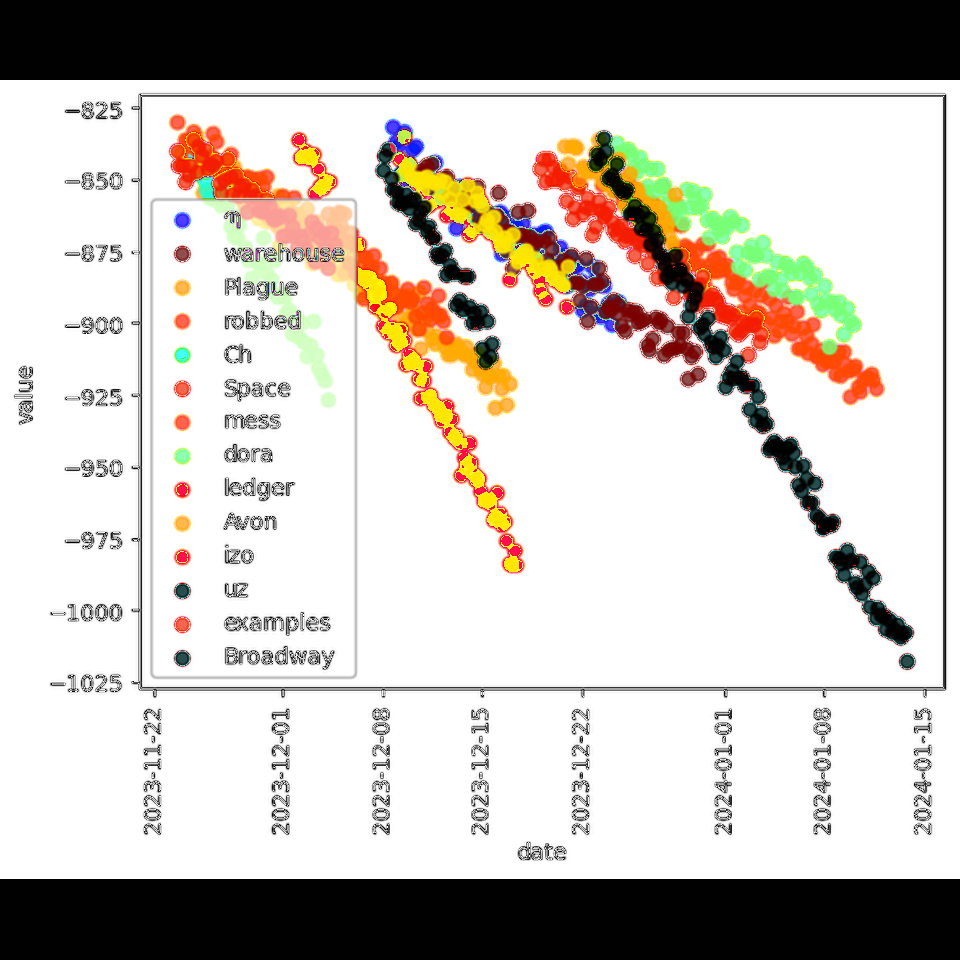

In [39]:
im

In [40]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(411)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart about trend and its abnormalities <s_answer> "This scatterplot shows the distribution of values over time for\'status\'. The data typically has a mean of -2466.718 and a standard deviation of 15.649, and it appears to be decreasing at a negative slope. There are three distinct groups present, with no other abnormalities noted."']
answer <summarize_chart> describe this chart about trend and its abnormalities <s_answer> This scatterplot shows the distribution of behavior values over time, with a mean of -2447.079 and a standard deviation of 30.84. The chart demonstrates a negative slope and features three distinct groups. Notably, one group (blue 'jg') deviates from the others by approximately 17% in terms of slope.</s>


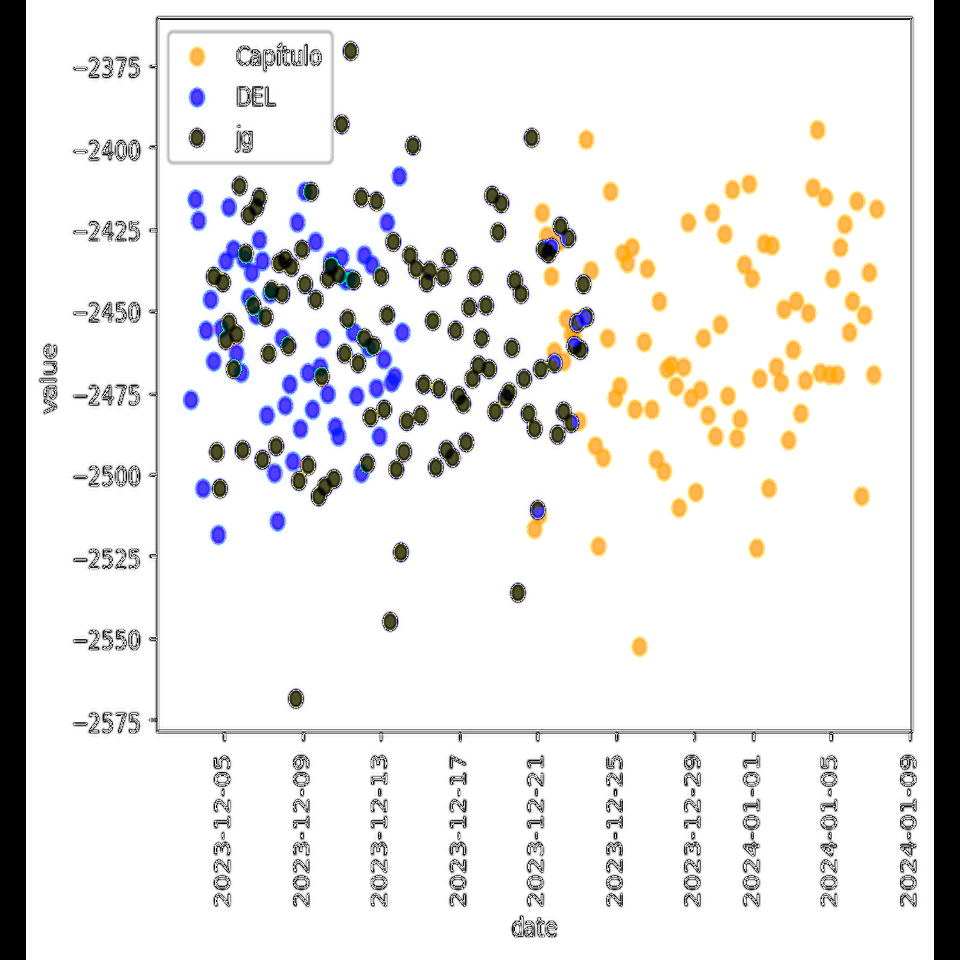

In [41]:
im

In [42]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(412)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about trend and its abnormalities <s_answer> This scatterplot shows the distribution of values over time for'register', with a mean of 579.933 and a standard deviation of 6.966. The trend line indicates a positive slope, with one group, labeled 'Cache', exhibiting a distinct difference in slope compared to the other groups, with a total of approximately 19%."]
answer <summarize_chart> describe this chart about trend and its abnormalities <s_answer> "This scatterplot shows the distribution of values over time for 'context'. The data typically has a mean of 573.785 and a standard deviation of 3.053, and there are a total of 9 groups. Out of these 9 groups, two have distinct trends compared to the others. The orange 'Robinson' group has an standard deviation difference of approximately 13% compared to other groups, while the blue 'Olympia' group has an average difference of around 16%."</s>


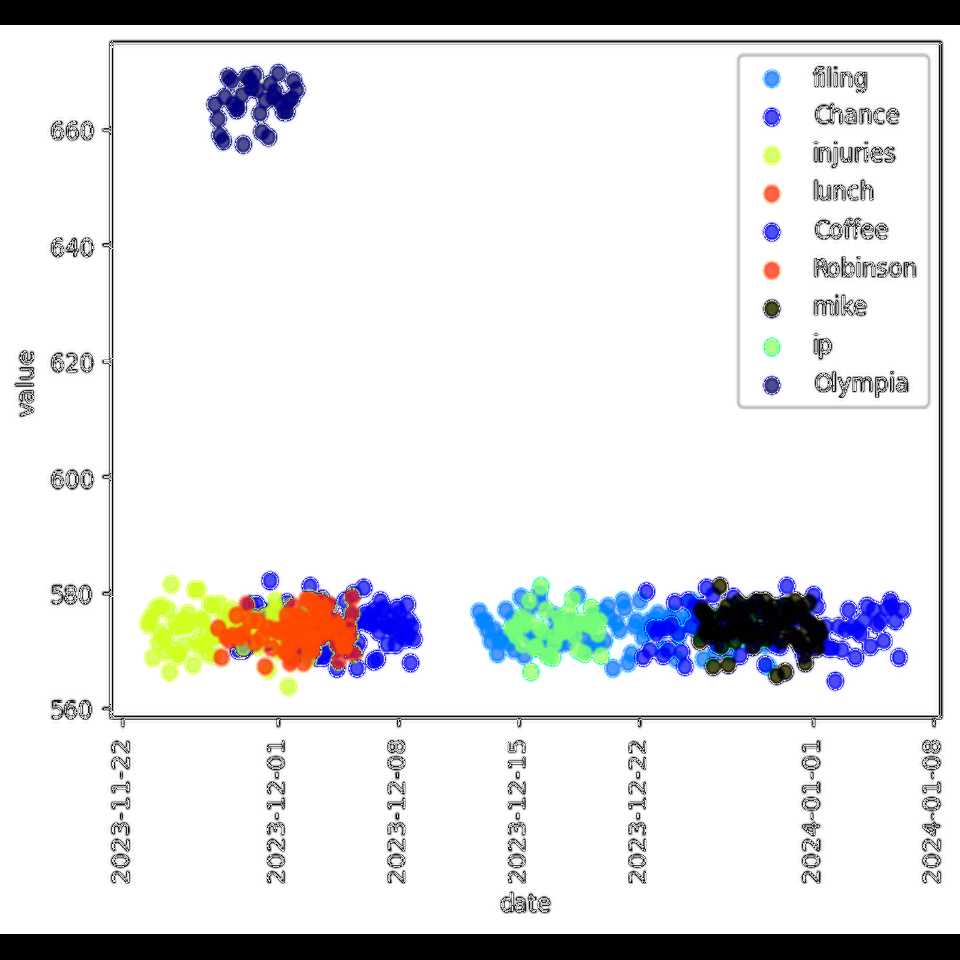

In [43]:
im

In [44]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(413)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot displays the relationship between 'plans' and 'lobbyist', with each point representing a single data point from one of the four groups. The mean values for 'plans' are approximately 1224.493, while the standard deviation is around 340.764. Similarly, the mean values for 'lobbyist' are around 73.194, with a standard deviation of about 73.167. The correlation coefficient of this scatter plot is greater than for 'lobbyist', which is about 72%. There are likely to suggesting this data usage is about the average values as indicates as indicates as indicates as indicates as indicates as the average is likely as the average has a fire fire A usually has a fire A usually has a fire A usually has a fire A usually has a lack of as it is about as it'."]
answer <summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot represents the rel

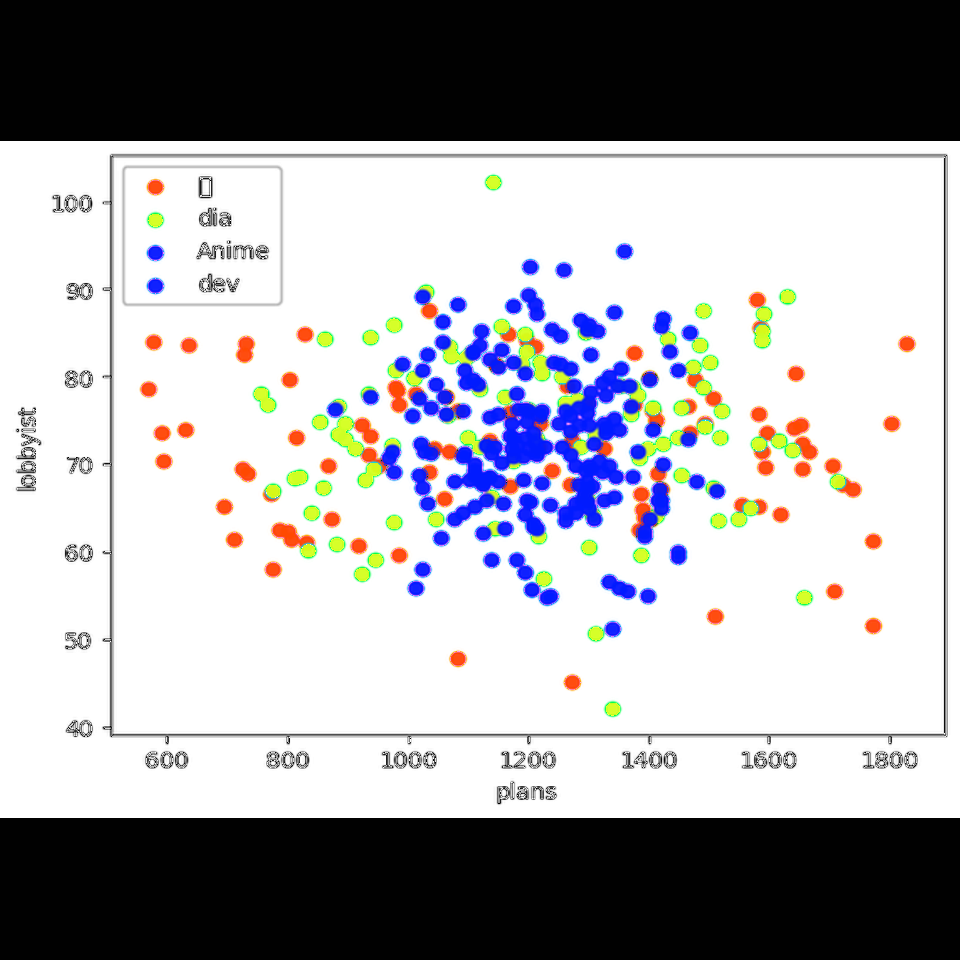

In [45]:
im

In [46]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(413)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ["<s><summarize_chart> describe this chart about correlation and its abnormalities <s_answer> This scatterplot displays the relationship between 'plans' and 'lobbyist', with each point representing a single data point from one of the four groups. The mean values for 'plans' are approximately 1224.493, while the standard deviation is around 340.764. Similarly, the mean values for 'lobbyist' are around 73.193, with a standard deviation of about 73.167. The correlation coefficient of this scatter plot is greater than for 'lobbyist', which is about 72%. There are likely to suggesting this data usage is about the average values on this chart is likely to tend to increased as indicates as indicates as the average has a patterns as the averages as the averages as the average has one tends as the average has one tends as the averages as the average has one tends as the average has one tends as the average has a negative"]
answer <summarize_chart> describe this chart about correlation and 

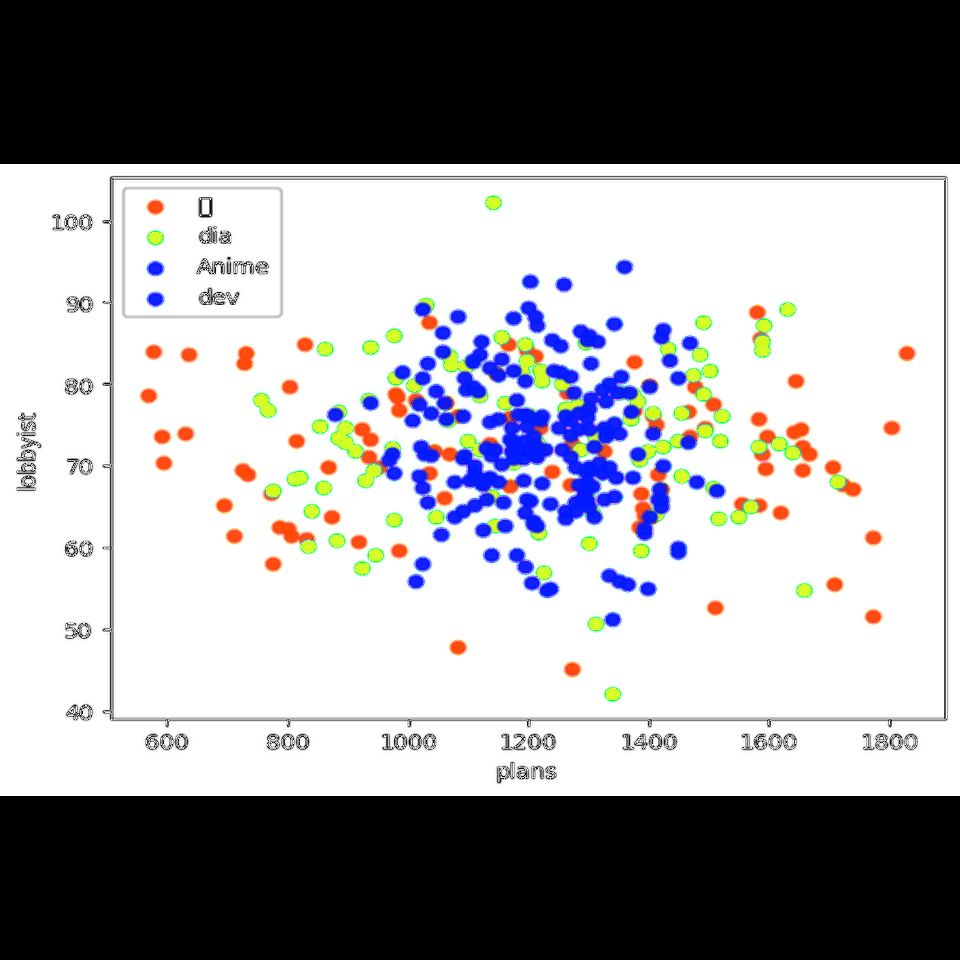

In [47]:
im

In [48]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(44)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart <s_answer> The pattern of the news coverage during the second aspect of a newshole is that the sharp decline in news coverage for black, where 10% of the population has been covered for a single job. In January, the average price of a midterm has stood at 40%, the level reached its peak, according to the latest data by last August. ']
answer <summarize_chart> describe this chart <s_answer> The drop in awareness comes as press attention to the war has waned. According to the News Content Index conducted by the Project for Excellence in Journalism, the percentage of news stories devoted to the war has sharply declined since last year, dropping from an average of 15% of the newshole in July to just 3% in February. </s>


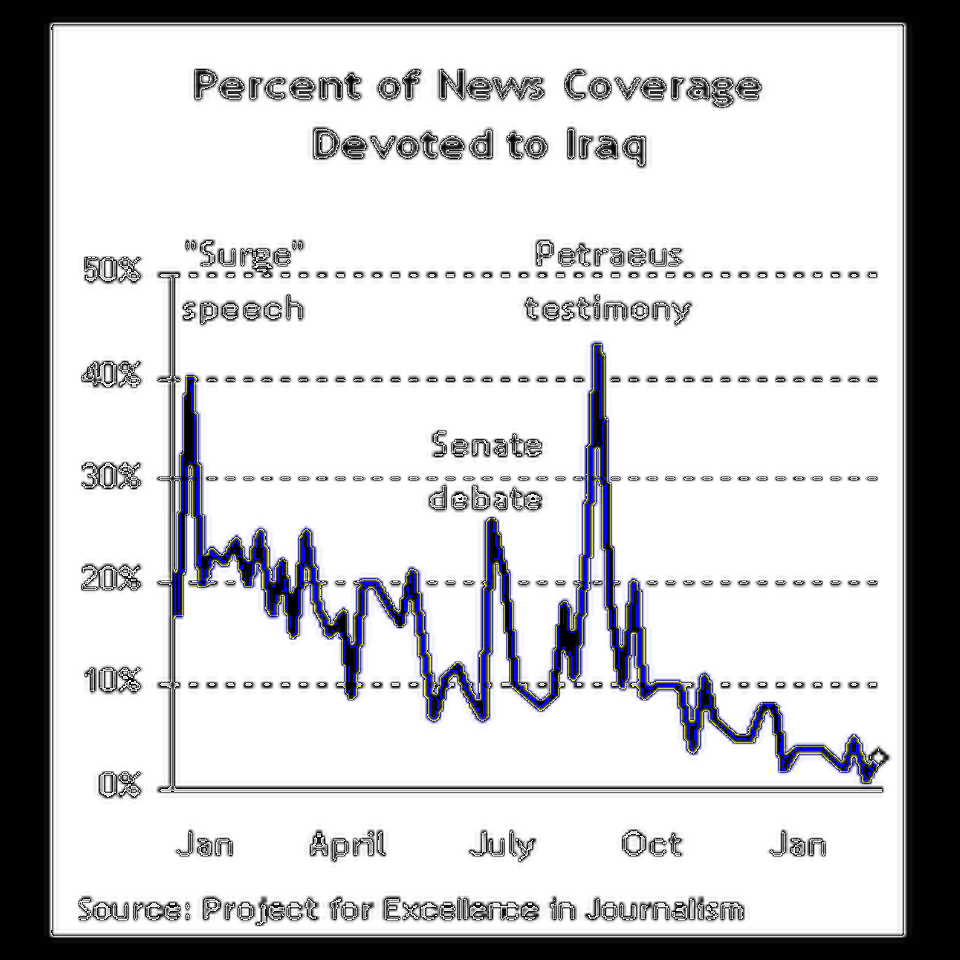

In [49]:
im

In [50]:
import torch
processor = DonutProcessor.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
model = VisionEncoderDecoderModel.from_pretrained("/content/drive/MyDrive/chart2text/unichart/UniChart/output/summary_chart-checkpoint-last")
from torch.nn.utils.rnn import pad_sequence

dataset=load_dataset()
args=ArgDataClass(max_length=512,batch_size=2,valid_batch_size=2,num_workers=1)
config = {"max_steps":1000,
            "check_val_every_n_epoch":1,
            "log_every_n_steps":1,
            "gradient_clip_val":1,
            "num_training_samples_per_epoch": len(dataset["train"]),
            "lr":5e-5,
            "train_batch_sizes": [args.batch_size],
            "val_batch_sizes": [args.valid_batch_size],
            "num_nodes": 1,
            "warmup_steps": 50,
            "verbose": True,
            }

val_dataset = SummaryChartDataset(dataset["valid"], processor = processor, max_length=args.max_length,
                                split="valid", prompt_end_token="<s_answer>", task_prefix = "<summarize_chart>"
                                )
pixel_values, decoder_input_ids, prompt_end_idxs, answers = val_dataset.__getitem__(45)
pixel_values=torch.unsqueeze(pixel_values, 0)
decoder_input_ids=torch.unsqueeze(decoder_input_ids, 0)
prompt_end_idxs=torch.unsqueeze(prompt_end_idxs, 0)
# answers=torch.unsqueeze(answers, 0)
decoder_prompts = pad_sequence(
            [input_id[: end_idx + 1] for input_id, end_idx in zip(decoder_input_ids, prompt_end_idxs)],
            batch_first=True,
        )

outputs = model.generate(pixel_values,
                        decoder_input_ids=decoder_prompts,
                        max_length=args.max_length,
                        early_stopping=True,
                        pad_token_id=processor.tokenizer.pad_token_id,
                        eos_token_id=processor.tokenizer.eos_token_id,
                        use_cache=True,
                        num_beams=4,
                        bad_words_ids=[[processor.tokenizer.unk_token_id]],
                        return_dict_in_generate=True,)
predictions = []
for seq in processor.tokenizer.batch_decode(outputs.sequences):
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    predictions.append(seq)
print('pred',predictions)
print('answer',answers)
import numpy as np
from PIL import Image
from matplotlib import cm
myarray=pixel_values.detach().cpu().numpy().squeeze(0)
im = Image.fromarray((myarray.transpose(1, 2, 0) * 255).astype(np.uint8)).convert('RGB')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pred ['<s><summarize_chart> describe this chart <s_answer> The general population of Minnesotan immigrants living in Additionally, Washington, immigrants with more than $16,100, are probably ahead of those who were born in Mexico. In addition to the general government debt, largely the number of unauthorized immigrants living in this country (48%) climbed to more than five-year period involution stable, according to a Pew Research Center analysis of government data from the Census Bureau’s Federal Reserve. ']
answer <summarize_chart> describe this chart <s_answer> The chart compares the federal minimum to the poverty thresholds for five different household types. (We used the Consumer Price Index for All Urban Consumers, Research Series, to adjust the wage levels.) For example, in 1968, when the minimum wage was at its peak value, one minimum-wage job could keep three people out of poverty. Today’s minimum, which works out to $15,080 a year (assuming a full 40-hour work week), will lif

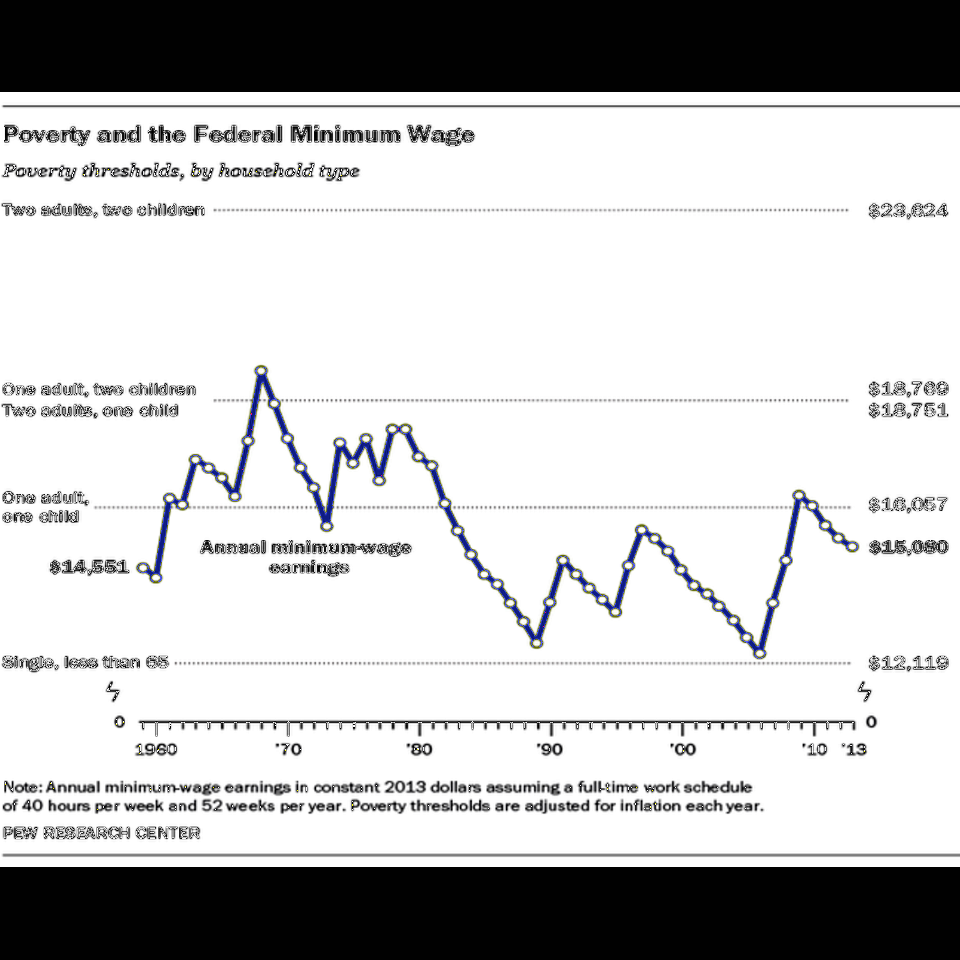

In [52]:
im